In [275]:
import pandas as pd
from matplotlib import style
import seaborn as sns
from scipy import stats
%matplotlib inline  
# style.use('tableau-colorblind10')
sns.set(style='darkgrid',color_codes=True)
sns.color_palette("Set2")


respath='../../data/evaluation/processed/'

In [266]:
occ_res = pd.read_csv(respath +'Occupation_Results.csv').sort_values('a_median',ascending=False)
print(len(occ_res))

1440


In [276]:
pd.crosstab(columns=[occ_res.wage_val],index=[occ_res.gender_detected_val],margins=True,normalize='index')

wage_val,high,low,medium,very high,very low
gender_detected_val,,,,,
man,0.259259,0.091787,0.172303,0.333333,0.143317
no face,0.215736,0.225888,0.200508,0.093909,0.263959
unknown,0.208333,0.333333,0.208333,0.041667,0.208333
woman,0.092269,0.334165,0.241895,0.107232,0.224439
All,0.200000,0.200000,0.200000,0.200000,0.200000


In [277]:
gd_list = ['unknown','no face']
occ_res = occ_res[~occ_res['gender_detected_val'].isin(gd_list)]
print(len(occ_res))

1022


In [279]:
import pandas as pd
import itertools

def apply_test(df, idkey="gender_detected_val", valuekey="a_median", test=stats.ks_2samp):
    """
    
    Apply two sample Kolmogorov-Smirnov to compare the underlying distributions of between man/woman and a_median.
    If the method is ‘auto’, the computation is exact if the sample sizes are less than 10000. 
    For larger sizes, the computation uses the Kolmogorov-Smirnov distributions to compute an approximate value.
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html#id1
    """
    # Group by identifier:
    g = df.groupby(idkey)
    # Generate all 2-combination of identifier:
    for k1, k2 in itertools.combinations(g.groups.keys(), 2):
        # Apply Statistical Test to grouped data:
        t = test(df.loc[g.groups[k1],valuekey], df.loc[g.groups[k2],valuekey])
        # Store Identifier pair:
        res = {"id1": k1, "id2": k2}
        # Store statistics and p-value:
        res.update({k: getattr(t, k) for k in t._fields})
        # Yield result:
        yield res

In [280]:
r = pd.DataFrame([x for x in apply_test(occ_res)])
r

,id1,id2,statistic,pvalue
0,man,woman,0.445191,4.925854e-44


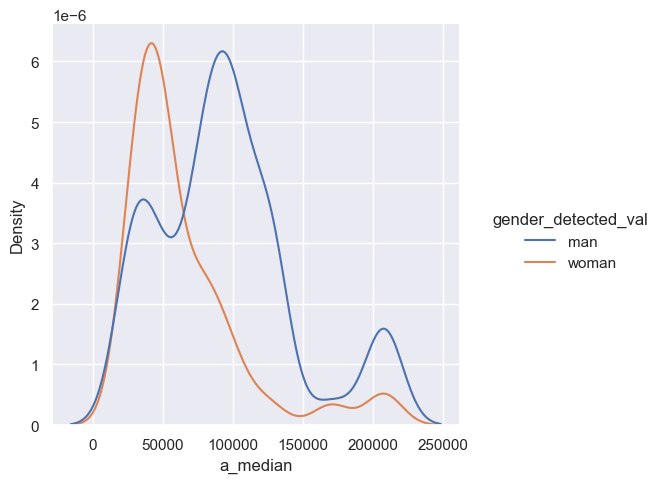

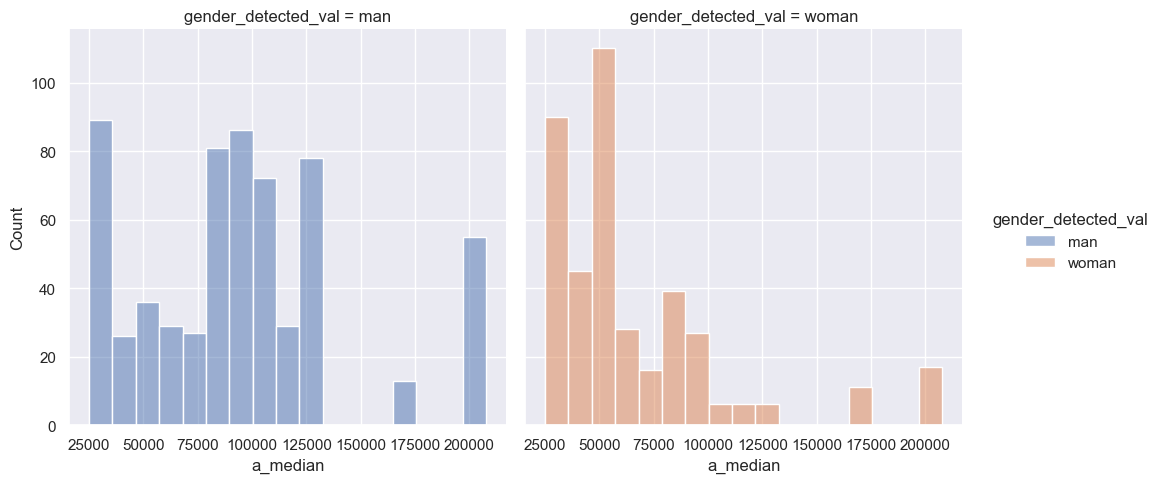

In [281]:
sns.displot(data=occ_res, x="a_median", hue="gender_detected_val", kind="kde")
sns.displot(data=occ_res, x='a_median', col='gender_detected_val',hue="gender_detected_val")

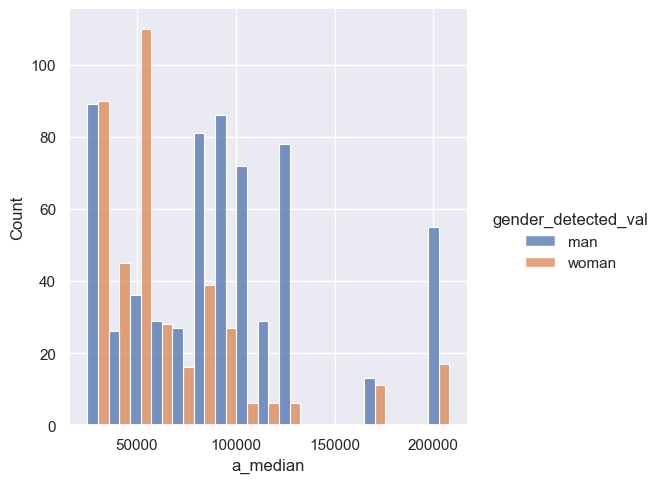

In [282]:
sns.displot(occ_res, x="a_median", hue="gender_detected_val", multiple="dodge")


<AxesSubplot: xlabel='gender_detected_val', ylabel='a_median'>

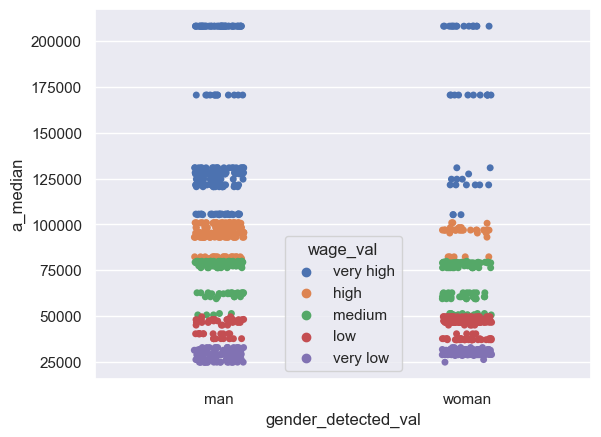

In [283]:
sns.stripplot(x="gender_detected_val", y="a_median", hue="wage_val", data=occ_res)


C:\Dev\Anaconda\envs\saac\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Dev\Anaconda\envs\saac\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Dev\Anaconda\envs\saac\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Dev\Anaconda\envs\saac\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Dev\Anaconda\envs\saac\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 34.3% of the p

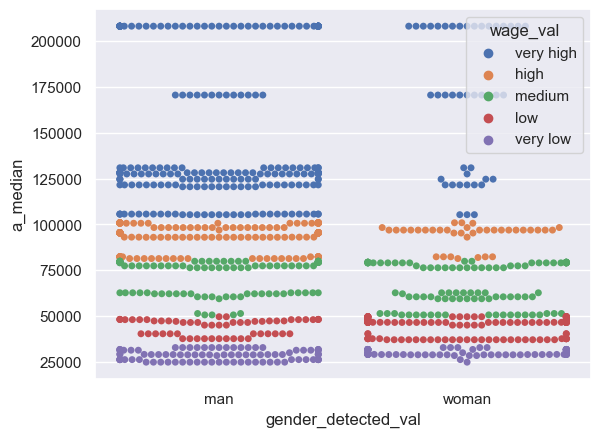

In [284]:
sns.swarmplot(x="gender_detected_val", y="a_median", hue="wage_val", data=occ_res);
plt.show()

<AxesSubplot: xlabel='a_median', ylabel='gender_detected_val'>

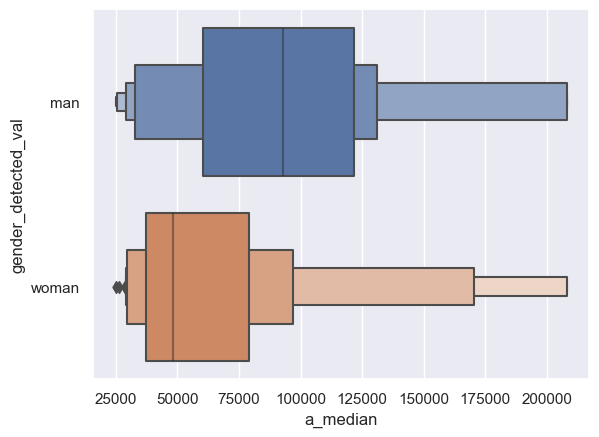

In [285]:
sns.boxenplot(data=occ_res, x='a_median', y='gender_detected_val')


<AxesSubplot: xlabel='a_median', ylabel='gender_detected_val'>

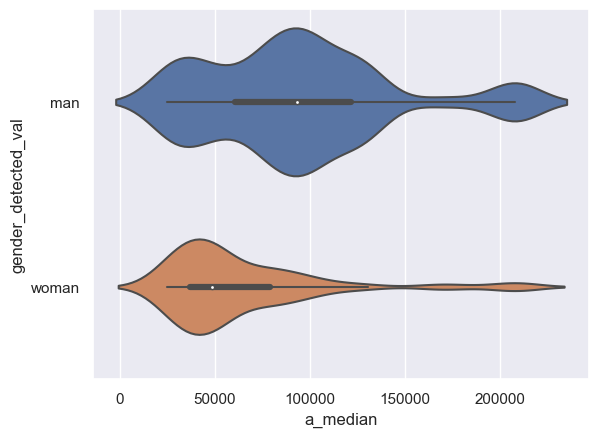

In [286]:
sns.violinplot(data=occ_res, x='a_median', y='gender_detected_val', scale='count')

<AxesSubplot: xlabel='a_median', ylabel='gender_detected_val'>

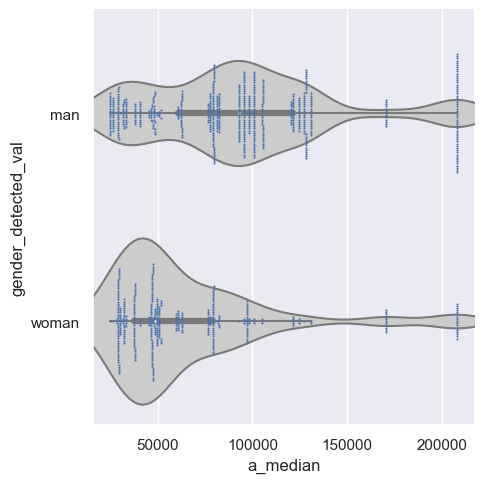

In [288]:
sns.catplot(data=occ_res, x='a_median', y='gender_detected_val', kind='violin', color='.8')
sns.swarmplot(data=occ_res, x='a_median', y='gender_detected_val', size=1.5)

<AxesSubplot: xlabel='a_median', ylabel='Density'>

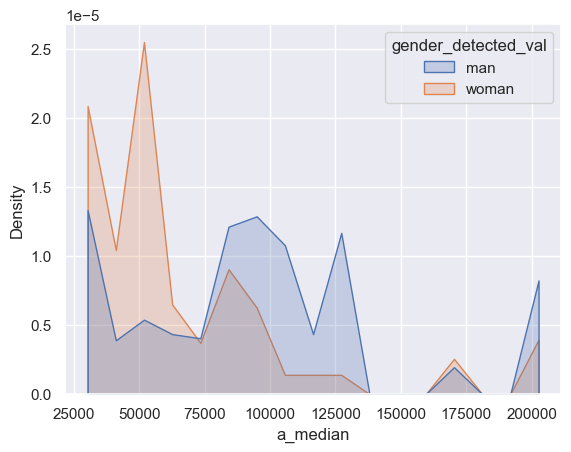

In [289]:
sns.histplot(occ_res, x='a_median', hue='gender_detected_val', element='poly',
    stat='density',common_norm=False)

<AxesSubplot: xlabel='a_mean', ylabel='Density'>

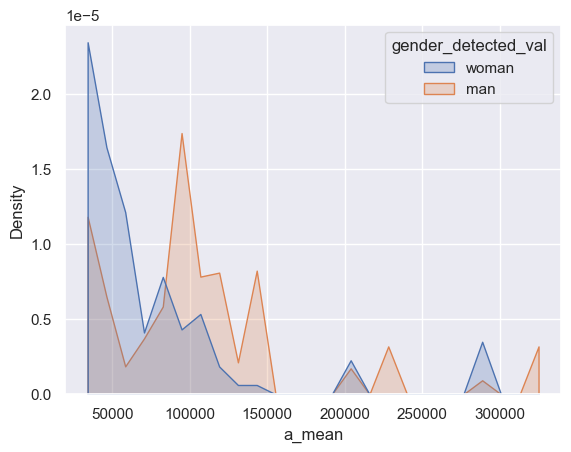

In [242]:
sns.histplot(occ_res, x='a_mean', hue='gender_detected_val', element='poly',
    stat='density',common_norm=False)

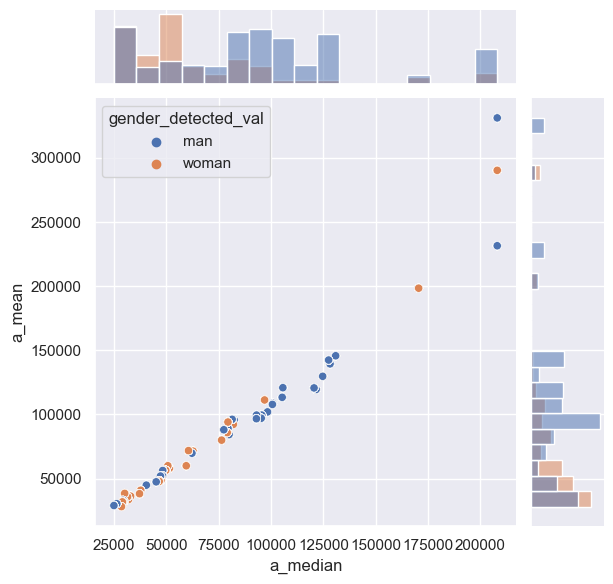

In [290]:
g = sns.JointGrid(data=occ_res, x='a_median', y='a_mean', hue='gender_detected_val')
g.plot(sns.scatterplot, sns.histplot)

In [20]:
tda_res = pd.read_csv(respath+'TDA_Results.csv' )
print(len(tda_res))
print(len(tda_res[tda_res['tda_compound']!=tda_res['prompt_compound']]))#prompt sentiment and tda sentiment are the same

1440
0


In [23]:
gd_list = ['unknown','no face']

tda_res = tda_res[~tda_res['gender_detected_val'].isin(gd_list)]

<AxesSubplot: xlabel='prompt_compound', ylabel='gender_detected_val'>

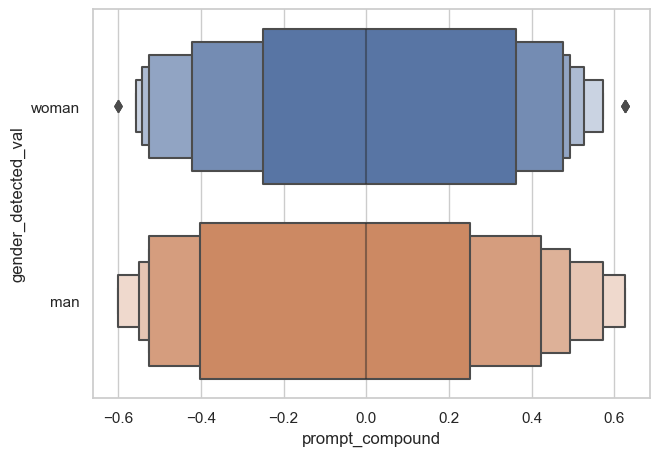

In [24]:
sns.boxenplot(data=tda_res, x='prompt_compound', y='gender_detected_val', scale='linear')

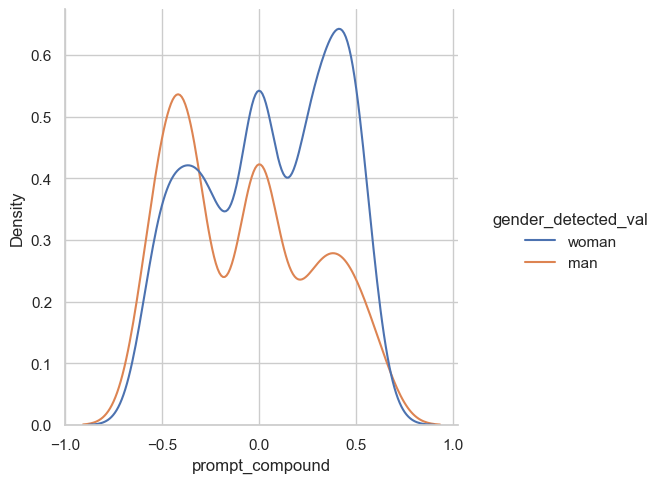

In [25]:
sns.displot(data=tda_res, x="prompt_compound", hue="gender_detected_val", 
           kind="kde"
           )



<AxesSubplot: xlabel='prompt_compound', ylabel='Density'>

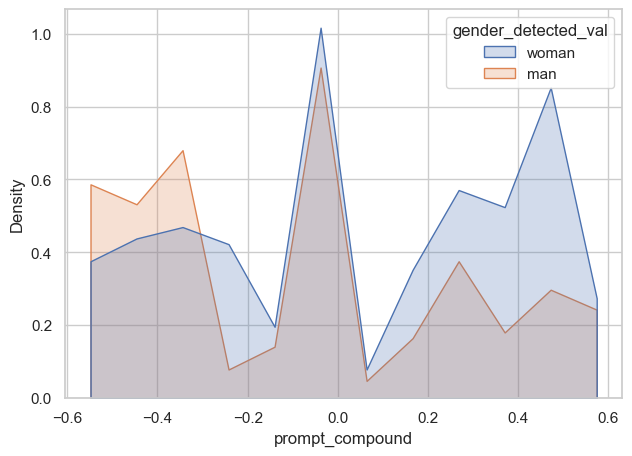

In [26]:
sns.histplot(tda_res, x='prompt_compound', hue='gender_detected_val', element='poly',
    stat='density'
)